# 水蒸気ライダーデータの読み込み（2ファイル）

In [35]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
from pathlib import Path
import xarray as xr

pd.set_option('display.max_rows', 20)

In [36]:
f0 = '../data/MRI_VAPOR/2021/07/09/23/Ko2107092330mgd.txt'
f1 = '../data/MRI_VAPOR/2021/07/09/23/Ko2107092345mgd.txt'

df0 = pd.read_table(f0, sep='\s+', header=2, index_col=0)
df1 = pd.read_table(f1, sep='\s+', header=2, index_col=0)
df1

,W[g/kg],dW[g/kg],R355,dR355,T[K],RO[gm^-3],PZ^2_355,Wsonde[g/kg],dWsonde[g/kg]
Altitude(km),,,,,,,,,
0.19237,20.72,0.4304,-999.0,-1290.0,286.9,1.2020,4362.20400,0.0,0.0
0.26732,20.46,0.3619,-999.0,-1290.0,286.4,1.1940,27074.46000,0.0,0.0
0.34227,20.76,0.4611,-999.0,-1290.0,285.9,1.1850,33810.27000,0.0,0.0
0.41721,20.61,0.5324,-999.0,-1290.0,285.4,1.1760,21473.49000,0.0,0.0
0.49216,19.73,0.7561,-999.0,-1290.0,284.9,1.1680,25104.15000,0.0,0.0
...,...,...,...,...,...,...,...,...,...
9.22362,-999.00,0.0000,-999.0,-1140.0,228.3,0.4545,42.54021,0.0,0.0
9.37351,-999.00,0.0000,-999.0,-1140.0,227.3,0.4463,43.93407,0.0,0.0
9.52341,-999.00,0.0000,-999.0,-1140.0,226.3,0.4382,45.35048,0.0,0.0


In [37]:
dt = 15 / 2.0
#dt = 0
t0 = pd.to_datetime("202107092330") + pd.Timedelta(minutes=dt)
t1 = pd.to_datetime("202107092345") + pd.Timedelta(minutes=dt)

In [38]:
diff = df1 - df0
diff

,W[g/kg],dW[g/kg],R355,dR355,T[K],RO[gm^-3],PZ^2_355,Wsonde[g/kg],dWsonde[g/kg]
Altitude(km),,,,,,,,,
0.19237,0.24,0.0039,0.0,-4.455000e+02,0.0,0.0,-1223.01200,0.0,0.0
0.26732,0.40,-0.0147,0.0,-4.455000e+02,0.0,0.0,4084.57000,0.0,0.0
0.34227,1.68,0.0425,0.0,-4.455000e+02,0.0,0.0,15632.24000,0.0,0.0
0.41721,1.45,0.0777,0.0,-4.455000e+02,0.0,0.0,5873.98000,0.0,0.0
0.49216,0.81,0.2673,0.0,-4.455000e+02,0.0,0.0,10087.88000,0.0,0.0
...,...,...,...,...,...,...,...,...,...
9.22362,0.00,0.0000,-10000999.0,-6.995000e+41,0.0,0.0,0.00000,0.0,0.0
9.37351,0.00,0.0000,-10000999.0,-7.403000e+41,0.0,0.0,0.00000,0.0,0.0
9.52341,0.00,0.0000,-10000999.0,-7.819000e+41,0.0,0.0,-45.35058,0.0,0.0


In [39]:
#pd.concat([df0, df1], keys=['a', 'b'])
df = pd.concat([df0, df1], keys=[t0, t1], names=["TIME", "LEV"]) # MultiIndexの作成


In [40]:
#xr = df.to_xarray()
#print(df)
#df.index
#df.columns
rmiss = np.nan
df = df.replace([-9.990000e+02], rmiss) # 欠損値-999.0をNANに置き換える
w = df['W[g/kg]']
dw = df['dW[g/kg]']
a = dw/w * 100
df['uncertainty[%]'] = a
a_th = 30.0 # (%)
#rmiss = -999.0
df['W2[g/kg]'] = df['W[g/kg]'].mask(a>a_th, rmiss) # a が30%を超える場合、欠損値を入力し w2 として df に格納


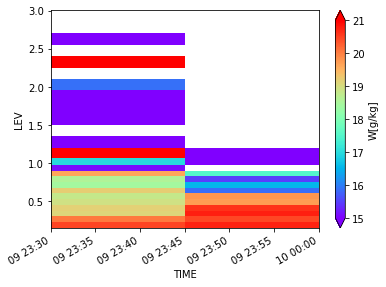

In [59]:
ds = df.to_xarray()
cmap = 'YlGnBu'
cmap = 'rainbow'
zmin = 0; zmax = 3
vmin = 15; vmax = 21
XR = ds.transpose("LEV", "TIME")
XR['W[g/kg]'].sel(LEV=slice(zmin, zmax)).plot(vmin=vmin, vmax=vmax, cmap=cmap)

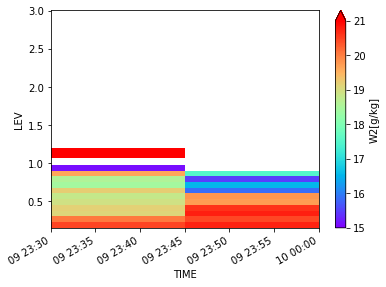

In [60]:
XR['W2[g/kg]'].sel(LEV=slice(zmin, zmax)).plot(vmin=vmin, vmax=vmax, cmap=cmap)
